Name: Sera Ahmed   
Course: CIS 9655 Data Visualization  
Assignment 1 name: MatPlotLib Dashboard  

Data Source: http://insideairbnb.com/get-the-data.html 
Data description: This is the Airbnb Data for New York. The data has unique row for each Airbnb listing. The data was last scraped in Feb 2021.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Users/sera/Downloads/airbnb_data.csv')

In [3]:
df.head(1)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20210204180331,2021-02-05,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,10.0,10.0,9.0,NaN,f,2,2,0,0,0.35


In [4]:
df['last_scraped'] = pd.to_datetime(df['last_scraped'], format='%Y-%m-%d')
df['host_since'] = pd.to_datetime(df['host_since'], format='%Y-%m-%d')
df['calendar_last_scraped'] = pd.to_datetime(df['calendar_last_scraped'], format='%Y-%m-%d')
df['first_review'] = pd.to_datetime(df['first_review'], format='%Y-%m-%d')
df['last_review'] = pd.to_datetime(df['last_review'], format='%Y-%m-%d')


In [5]:
df['price'] = df['price'].str.strip('$')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'])

# Line Chart

The line chart below shows the number of Airbnb hosts registered per year for all boroughs in New York. It clearly shows how the registeration of hosts started in the year 2008 i.e. when the company started and how it grew massively till year 2015 then started to decline. This could probably be that all the people who could or wanted to register their property as Airbnb had done it by the year 2015 and then it started declining because there is not many property left to rent out under Airbnb. Year 2020 shows a huge decline which could possibly be because of the pandemic COVID-19. 

In [6]:
line_chart_data = df[df['host_since'] < '2021-01-01']
line_chart = line_chart_data[['host_since','id','neighbourhood_group_cleansed']]
line_chart['year'] = pd.DatetimeIndex(line_chart['host_since']).year
line_chart_grp = line_chart.groupby(['year','neighbourhood_group_cleansed'])
line_chart_grp_agg = line_chart_grp.agg({'id':'count'})
line_chart_grp_agg.reset_index(inplace=True)

In [7]:
brooklyn = line_chart_grp_agg[line_chart_grp_agg['neighbourhood_group_cleansed']=='Brooklyn'][['year','id']]
manhattan = line_chart_grp_agg[line_chart_grp_agg['neighbourhood_group_cleansed']=='Manhattan'][['year','id']]
queens = line_chart_grp_agg[line_chart_grp_agg['neighbourhood_group_cleansed']=='Queens'][['year','id']]
bronx = line_chart_grp_agg[line_chart_grp_agg['neighbourhood_group_cleansed']=='Bronx'][['year','id']]
staten_island = line_chart_grp_agg[line_chart_grp_agg['neighbourhood_group_cleansed']=='Staten Island'][['year','id']]


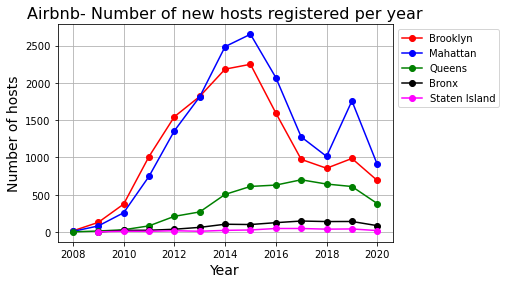

In [8]:
fig1 = plt.figure()
plt.plot(brooklyn["year"],brooklyn['id'],color= 'red',marker='o',label='Brooklyn')
plt.plot(manhattan["year"],manhattan['id'],color= 'blue',marker='o',label='Mahattan')
plt.plot(queens["year"],queens['id'],color= 'green',marker='o',label='Queens')
plt.plot(bronx["year"],bronx['id'],color= 'black',marker='o',label='Bronx')
plt.plot(staten_island["year"],staten_island['id'],color= 'magenta',marker='o',label='Staten Island')

plt.title("Airbnb- Number of new hosts registered per year",fontsize=16)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Number of hosts",fontsize=14)
plt.legend(bbox_to_anchor=(1.0, 1.0),loc='upper left')
plt.grid(True)
plt.show()

# Pie chart

The below pie chart shows the number of Airbnb properties listed for the different boroughs in New York. It shows that the most number of prpoerties are listed for Manhattan. This makes sense as most tourists like to visit and tour around Manhattan and it is more convinient to stay there versus any other place to avoid commute. Out of the total Airbnb's listed 44.7% of them are in Manhattan 39.1% are in Brooklyn. 

In [9]:
pie_chart = df[['neighbourhood_group_cleansed','id']]
pie_chart_grp = pie_chart.groupby(['neighbourhood_group_cleansed'])
pie_chart_grp_agg = pie_chart_grp.agg({'id':'count'})

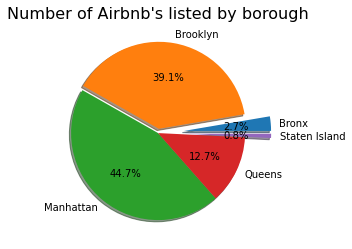

In [10]:
labels = pie_chart_grp_agg.index
values = pie_chart_grp_agg['id']
explode = (0.3, 0.05, 0, 0, 0.3) 

fig2 = plt.figure()
plt.pie(values, 
        #colors=colors, 
        labels=labels, 
        explode=explode,  
        autopct='%1.1f%%',
        counterclock=True, 
        shadow=True)

plt.title("Number of Airbnb's listed by borough",fontsize=16)
plt.show()

# Bar graph

Let's dig deeper in Manhattan which is the bourough with most Airbnb's and get some insights on it. The bar graph below shows the total amount of listing for each Airbnb type in $$. It clearly shows that how the 'Enire home/ Apartment' is the highest in the amount for money it has been listed for, which also makes sense as an Entire home would be more expensive than a hotel room, private room or a shared room. 

In [11]:
bar_chart_manhattan = df[df['neighbourhood_group_cleansed'] == 'Manhattan'][['room_type','price']]
bar_chart_manhattan_grp = bar_chart_manhattan.groupby(['room_type'])
bar_chart_manhattan_agg = bar_chart_manhattan_grp.agg({'price':'sum'})
bar_chart_manhattan_agg.columns=['price']


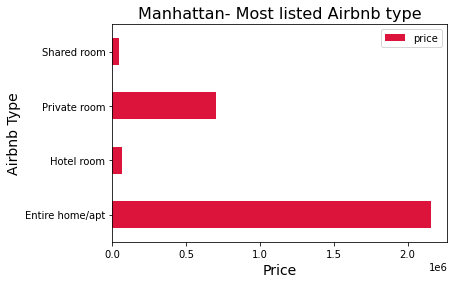

In [12]:
#bar_xlabels=['Entire home/apt','Hotel room','Private room','Shared room']
bar_chart_manhattan_agg.plot.barh(color='crimson')
plt.title("Manhattan- Most listed Airbnb type",fontsize=16)
plt.xlabel("Price",fontsize=14)
plt.ylabel("Airbnb Type",fontsize=14)
#plt.xticks(Rotation=360)
plt.show()

# Scatter plot

Now I'm sure we must be curious to see that in the most listed Airbnb type 'Entire home/apt', how many people can it accommodate, specifically in Manhattan. Also to see if there is any relation in the number of people the Airbnb can accommodate versus the price. 

In [13]:
scatterplot = df[(df['room_type']=='Entire home/apt')&(df['neighbourhood_group_cleansed']=='Manhattan')][['accommodates','price']]
accommodates=scatterplot['accommodates']
price=scatterplot['price']

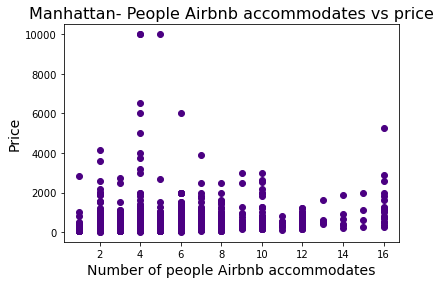

In [14]:
fig4 = plt.figure()
plt.scatter(accommodates,price,color='indigo')
plt.xlabel("Number of people Airbnb accommodates",fontsize=14)
plt.ylabel("Price",fontsize=14)
plt.title("Manhattan- People Airbnb accommodates vs price",fontsize=16)
plt.show()

# Histogram

However, let's check now that what number of people are most of the Airbnb's able to accommodate out of all the Airbnb types and between all boroughs. We will plot a histogram to visualize the results and see how the spread is. Looks like from the below histogram that most of the Airbnb's can accommodate around 2-3 people. This makes sense as not many people like to travel alone and they need at least one or two people to travel with. Also, not always you travel and stay in such expensive places like New York with family. :) 

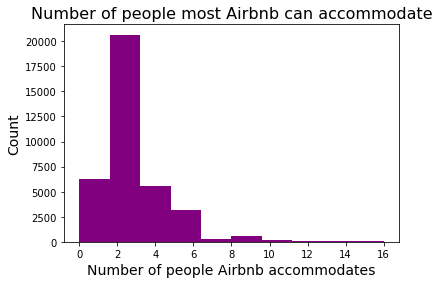

In [15]:
histogram = df['accommodates']
fig5 = plt.figure()
plt.hist(histogram,color='purple')

plt.xlabel("Number of people Airbnb accommodates",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.title("Number of people most Airbnb can accommodate",fontsize=16)
plt.show()

# Matplotlib Dashboard

The below Matplotlib dashboard is based on the Airbnb data for New York and taken from the Airbnb website.   
 
Below are some insights that we get from visualizing the data.   
  
- The number of people registering for becoming hosts was highest in the eyar 2015 anf then started declining. Probably because most people who would have wanted to become hosts had already registered by then. All boroughs follow the same trend in this case of hosts being registered per year.  
  
  
- The number of Airbnbs are highest in Manhattan followed by Brooklyn. Manhattan has about 45% of total Airbnb's of New York and then Brookly has about 39% and remaining are in Queens, Staten Island and Bronx.   
  
  
- In Manhattan specifically the Airbnb type with the highest amount of $$ listing is 'Entire home/ apt' followed by Private room.  
  
  
- In Manhattan, the rooms where four people could be accommodated are sold for higher amounts.   
  
  
- Of all Airbnb from all boroughs, most Airbnb can accommodate two to three people. 
  

(0.0, 1.0, 0.0, 1.0)

<Figure size 432x288 with 0 Axes>

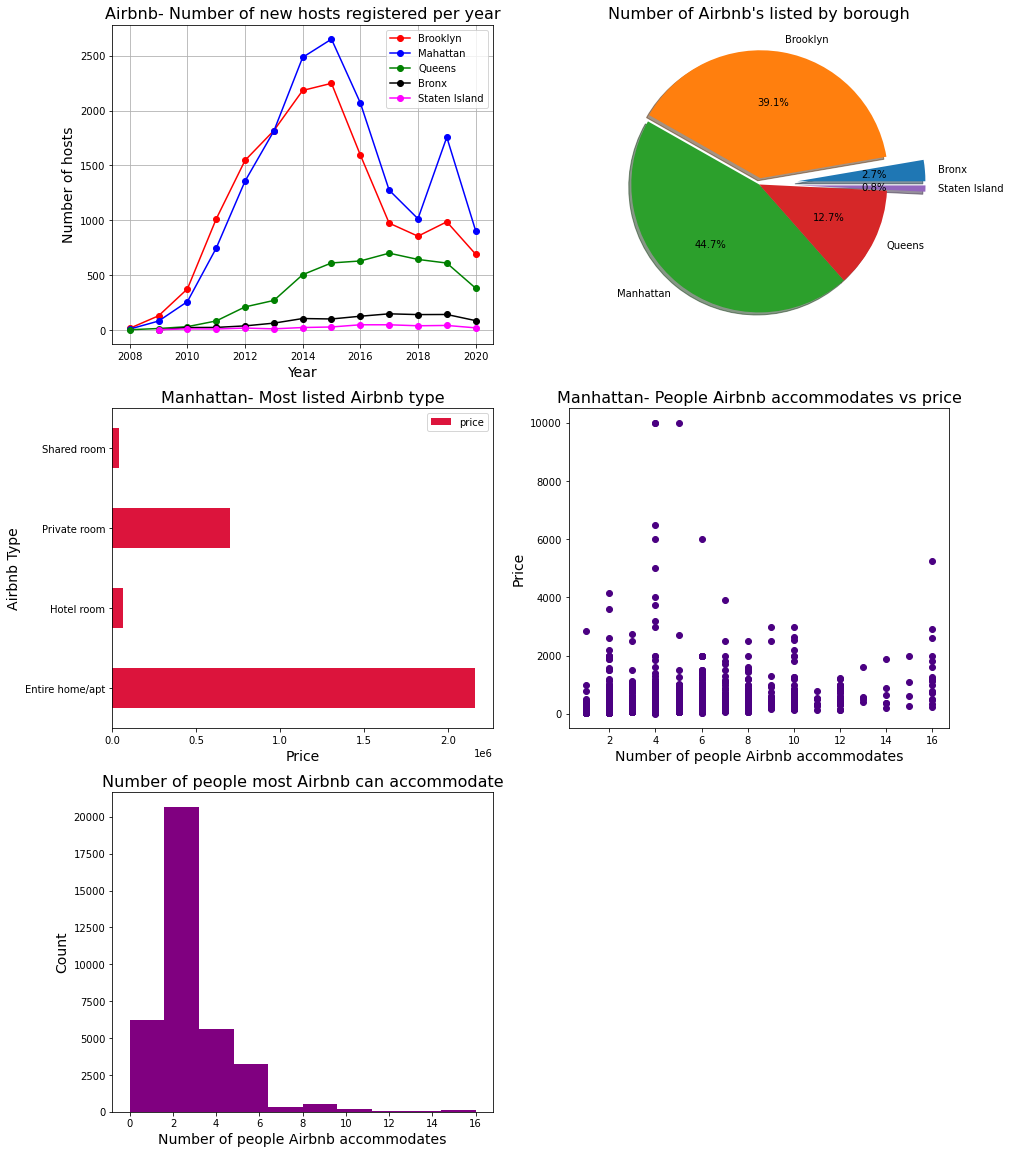

In [16]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
fig, axes = plt.subplots(3, 2, figsize=(15,20))
###################################################################################################################

## This code is to plot the line graph

ax1=axes[0,0].plot(brooklyn["year"],brooklyn['id'],color= 'red',marker='o',label='Brooklyn')
axes[0,0].plot(manhattan["year"],manhattan['id'],color= 'blue',marker='o',label='Mahattan')
axes[0,0].plot(queens["year"],queens['id'],color= 'green',marker='o',label='Queens')
axes[0,0].plot(bronx["year"],bronx['id'],color= 'black',marker='o',label='Bronx')
axes[0,0].plot(staten_island["year"],staten_island['id'],color= 'magenta',marker='o',label='Staten Island')
axes[0,0].set_title("Airbnb- Number of new hosts registered per year",fontsize=16)
axes[0,0].set_xlabel("Year",fontsize=14)
axes[0,0].set_ylabel("Number of hosts",fontsize=14)
axes[0,0].legend()
axes[0,0].grid(True)
###################################################################################################################

## This code is to plot the pie chart

ax2=axes[0,1].pie(values, 
        #colors=colors, 
        labels=labels, 
        explode=explode,  
        autopct='%1.1f%%',
        counterclock=True, 
        shadow=True)
axes[0,1].set_title("Number of Airbnb's listed by borough",fontsize=16)
###################################################################################################################

## This code is to plot the bar graph 

bar_chart_manhattan_agg.plot.barh(ax=axes[1,0],color='crimson')
axes[1,0].set_title("Manhattan- Most listed Airbnb type",fontsize=16)
axes[1,0].set_xlabel("Price",fontsize=14)
axes[1,0].set_ylabel("Airbnb Type",fontsize=14)
###################################################################################################################

## This code is to plot the scatterplot

ax4 = axes[1,1].scatter(accommodates,price,color='indigo')
axes[1,1].set_xlabel("Number of people Airbnb accommodates",fontsize=14)
axes[1,1].set_ylabel("Price",fontsize=14)
axes[1,1].set_title("Manhattan- People Airbnb accommodates vs price",fontsize=16)
###################################################################################################################

## This code is to plot the histogram

ax5=axes[2,0].hist(histogram,color='purple')
axes[2,0].set_xlabel("Number of people Airbnb accommodates",fontsize=14)
axes[2,0].set_ylabel("Count",fontsize=14)
axes[2,0].set_title("Number of people most Airbnb can accommodate",fontsize=16)
###################################################################################################################

axes[2,1].axis("off")


# Thank you!!